<a href="https://colab.research.google.com/github/Hayko00077/AI_Projects/blob/main/Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
5!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool

In [ ]:
data=pd.read_csv("/content/melb_data.csv (1).zip")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<Axes: >

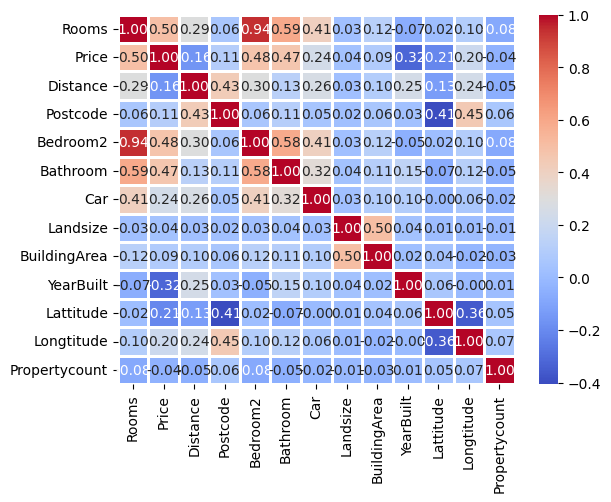

In [ ]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)



In [ ]:
data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


<Axes: xlabel='Car', ylabel='Count'>

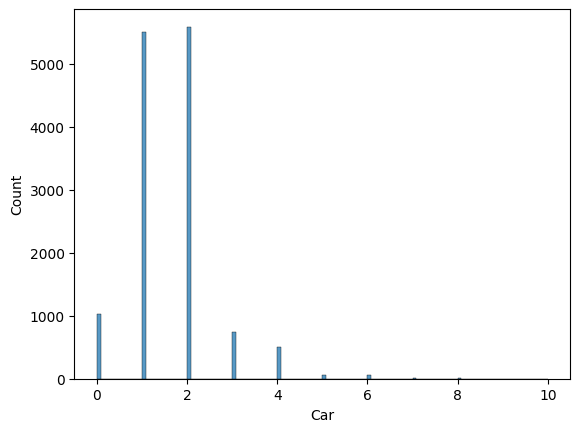

In [ ]:
sns.histplot(data['Car'])

<Axes: ylabel='Car'>

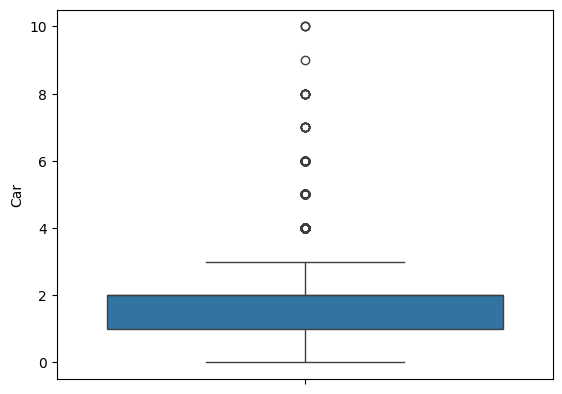

In [ ]:
sns.boxplot(data['Car'])

In [ ]:
data['Car']=data['Car'].fillna(data['Car'].median())

In [ ]:
imputation_cols = ['BuildingArea', 'Landsize', 'Rooms']
df_impute = data[imputation_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_impute)
imputer = KNNImputer(n_neighbors=5)
df_imputed_scaled = imputer.fit_transform(df_scaled)
data[imputation_cols] = scaler.inverse_transform(df_imputed_scaled)

In [ ]:
data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
data['YearBuilt']=pd.to_numeric(data['YearBuilt'],errors='coerce')
data['YearBuilt']=data.groupby(['Distance','Bathroom'])['YearBuilt'].transform(lambda x:x.fillna(x.median()))
data['YearBuilt'].isnull().sum()

np.int64(99)

In [ ]:
data['YearBuilt']=pd.to_numeric(data['YearBuilt'],errors='coerce')
data['YearBuilt']=data['YearBuilt'].fillna(data['YearBuilt'].median())
data['YearBuilt'].isnull().sum()

np.int64(0)

In [ ]:
data['CouncilArea'].fillna(data['CouncilArea'].mode()[0],inplace=True)


/tmp/ipython-input-1181177048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CouncilArea'].fillna(data['CouncilArea'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
for feature in data[categorical_columns]:
  print(f'{feature}:{data[feature].nunique()}')

Suburb:314
Address:13378
Type:3
Method:5
SellerG:268
Date:58
CouncilArea:33
Regionname:8


In [ ]:
data_encoded=data.copy()

In [ ]:
treshold=10
for feature in categorical_columns:
    unique_count = data[feature].nunique()
    if unique_count<=treshold:
      data_encoded=pd.get_dummies(data_encoded, columns=[feature], drop_first=True)
    else:
      le=LabelEncoder()
      data_encoded[feature]=le.fit_transform(data[feature])

In [ ]:
y_encode=data_encoded['Price']
X_encode=data_encoded.drop('Price',axis=1)

In [ ]:
X_encode_train, X_encode_test, y_encode_train, y_encode_test = train_test_split(
    X_encode,
    y_encode,
    test_size=0.2,
    random_state=42
)


In [ ]:
tree=DecisionTreeRegressor()
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_encode_train,y_encode_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [ ]:
best_params=random_search.best_params_
best_params

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 10}

In [ ]:
tree1=DecisionTreeRegressor(min_samples_split =  5,
 min_samples_leaf =  1,
 max_features =  None,
 max_depth = 10)

In [ ]:
tree1.fit(X_encode_train,y_encode_train)
y_predict_encode=tree1.predict(X_encode_test)

In [ ]:
rmse = root_mean_squared_error(y_encode_test, y_predict_encode)
r2_encod = r2_score(y_encode_test, y_predict_encode)
print(f'RMSE value for  decision tree is: {rmse:.2f}')
print(f'r2 score for decision tree is: {r2_encod:.2f}')

RMSE value for  decision tree is: 346879.73
r2 score for decision tree is: 0.70


In [ ]:
random_tree=RandomForestRegressor()
param_grid = {
    'n_estimators': np.arange(10, 500, 30),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_encode_train,y_encode_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py",

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490])},
                   random_state=42, verbose=2)

In [ ]:
best_params=random_search.best_params_
best_params

{'n_estimators': np.int64(310),
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': np.int64(40),
 'bootstrap': False}

In [ ]:
tree1=RandomForestRegressor(n_estimators= np.int64(310),
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= np.int64(40),
 bootstrap= False)

In [ ]:
tree1.fit(X_encode_train,y_encode_train)
y_predict_encode=tree1.predict(X_encode_test)

In [ ]:
rmse = root_mean_squared_error(y_encode_test, y_predict_encode)
r2_encod = r2_score(y_encode_test, y_predict_encode)
print(f'RMSE value for  RandomForest is: {rmse:.2f}')
print(f'r2 score for RandomForest is: {r2_encod:.2f}')

RMSE value for  decision tree is: 260765.48
r2 score for decision tree is: 0.83


In [ ]:
y=data['Price']
X=data.drop('Price',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat = CatBoostRegressor(verbose=0,random_seed=44)
param_dist = {
    'depth': [4, 6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'iterations': [300, 500, 800, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9], 'bagging_temperature': [0, 0.5, 1, 2]}
cat_features = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname' ]
search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=16,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42)
search.fit(X_train, y_train, cat_features=cat_features)



RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7acc50b36a80>,
                   n_iter=16, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1, 2],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [300, 500, 800, 1000],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
final_model = CatBoostRegressor(
    depth=6,
    learning_rate=0.1,
    iterations=1000,
    l2_leaf_reg=3,
    cat_features=cat_features,
    random_seed=42,
    verbose=200)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
y_pred = final_model.predict(X_test)

0:	learn: 605838.8722903	test: 593909.1242539	best: 593909.1242539 (0)	total: 35.6ms	remaining: 35.6s
200:	learn: 242628.7340404	test: 257182.5647463	best: 257182.5647463 (200)	total: 5.42s	remaining: 21.5s
400:	learn: 213164.5777205	test: 247450.1771572	best: 247421.0893304 (398)	total: 12.2s	remaining: 18.3s
600:	learn: 193992.1737615	test: 243549.2973853	best: 243540.2297437 (598)	total: 17.8s	remaining: 11.8s
800:	learn: 178922.9976928	test: 239771.9567295	best: 239771.9567295 (800)	total: 24.8s	remaining: 6.16s
999:	learn: 167428.0716127	test: 238583.9717059	best: 238583.9717059 (999)	total: 30.4s	remaining: 0us

bestTest = 238583.9717
bestIteration = 999



In [ ]:
final_model.fit(X_train,y_train)
y_predict=final_model.predict(X_test)

0:	learn: 605838.8722903	total: 31.2ms	remaining: 31.2s
200:	learn: 242628.7340404	total: 6.55s	remaining: 26s
400:	learn: 213164.5777205	total: 11.8s	remaining: 17.6s
600:	learn: 193992.1737615	total: 17.7s	remaining: 11.8s
800:	learn: 178922.9976928	total: 23.9s	remaining: 5.94s
999:	learn: 167428.0716127	total: 29.2s	remaining: 0us


In [ ]:
rmse = root_mean_squared_error(y_test, y_predict)
r2_encod = r2_score(y_test, y_predict)
print(f'RMSE value for  Catboost is: {rmse:.2f}')
print(f'r2 score for Catboost  is: {r2_encod:.2f}')

RMSE value for  Catboost is: 238583.97
r2 score for Catboost  is: 0.86
